# **MEAN SHIFT**

## **Implementacion**

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt, e
from random import randint, uniform
from time import sleep

from IPython.display import display, clear_output

In [65]:
class MeanShift:
  def __init__(self, X):
    self.X = X
    
  def gauss(self, x, y, b):
    """ Kernel Gaussiano. """
    return e**(-np.dot(x-y, x-y)/(2*(b**2)))
               
  def train(self, b):
    """ Realizamos el clustering. """
    # Hacemos una copia de los datos. La copia sera la que se modificara.
    X_aux = [x.copy() for x in X]
    # Indica si el i-esimo dato ya alcanzo una cima.
    peek = [False for _ in X]
    # Graficaremos cada shift.
    fig = plt.figure()
    g = fig.add_subplot(111)
    
    # Mientras no todos los datos se encuentren en un pico.
    while not all(peek):
      # Por cada dato.
      for i in range(len(self.X)):
        # Si no esta en un pico.
        if not peek[i]:
          # Almacenamos el valor actual del dato y realizamos el shift.
          x_last = X_aux[i].copy()
          X_aux[i] = self.shift(X_aux[i], b)
          # Si la distancia que se movio el dato es menor a un epsilon,
          # alcanzamos un pico.
          if np.linalg.norm(x_last - X_aux[i]) < 0.01: peek[i] = True
         
      # Limpiamos la grafica y graficamos los nuevos datos.
      g.cla()
      g.plot([x[0] for x in X_aux], [x[1] for x in X_aux], 'o')
      display(fig)
      clear_output(wait = True)
      plt.pause(0.5)
    return X_aux
               
  def shift(self, x, b):
    """ Realiza un shift en un dato. """
    # Aqui almacenaremos el shift en cada coordenada.
    d = np.array([0.0 for _ in range(len(x))])
    f = 0
    # Por cada dato.
    for x_i in self.X:
      w = self.gauss(x, x_i, b)
      d += np.array([w*x_i[j] for j in range(len(x_i))])
      f += w
    return d/f

## **Lectura de Datos**

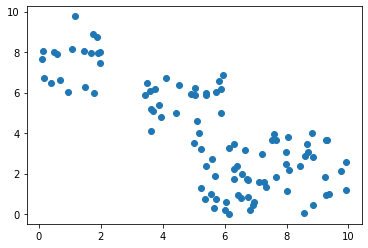

In [66]:
X = []
while len(X) < 100:
  d = [uniform(0, 10), uniform(0, 10)]
  if ((0 <= d[0] <= 2) and (6 <= d[1] <= 10)) or \
    ((3 <= d[0] <= 6) and (4 <= d[1] <= 7)) or \
    ((5 <= d[0] <= 10) and (0 <= d[1] <= 4)):
    X.append(np.array(d))
    
plt.plot([x[0] for x in X], [x[1] for x in X], 'o')
plt.show()

## **Resultados**

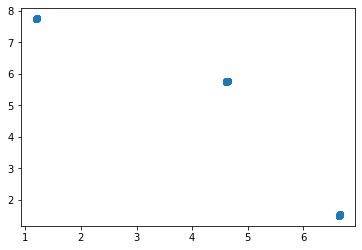

In [67]:
MS = MeanShift(X)
X_r = MS.train(1)